In [15]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv("merged_output_features.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,label
0,-378.381226,76.678459,23.239784,13.843393,-5.965930,-34.010609,-32.301823,-12.570757,-12.027764,-16.687765,...,0.157032,0.271695,0.199551,0.092379,0.077370,0.012950,0.070789,16.968049,0.224802,1
1,-380.143799,100.597214,15.078894,2.440198,-10.985611,-30.110996,-30.983414,-17.078562,-17.298779,-18.734821,...,0.138701,0.236866,0.206389,0.088181,0.075871,0.011050,0.108802,16.039196,0.145663,1
2,-304.669098,118.192703,2.042840,15.504647,-7.542607,-33.852650,-39.650818,-19.708704,-5.323081,-8.056992,...,0.216409,0.254743,0.280462,0.094490,0.092035,0.007948,0.058204,19.400424,0.093365,1
3,-308.821411,89.359093,10.470924,28.855902,-3.093584,-32.251301,-31.907427,-18.246683,-12.992827,-23.487600,...,0.116543,0.299894,0.209227,0.093146,0.112789,0.012746,0.069317,19.505548,0.107881,1
4,-340.816803,59.974323,12.205260,18.845779,-9.285711,-23.310375,-38.347187,-21.094282,-11.288987,-16.105379,...,0.151425,0.230372,0.215532,0.085833,0.078073,0.012030,0.095974,15.334975,0.181497,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["label"]),
    df["label"],
    test_size=0.1,
    random_state=42,
    stratify=df["label"],
)

In [ ]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.3,
    objective="multi:softmax",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1,
)

In [19]:
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np

weights_tr = compute_sample_weight("balanced", y_train)
model.fit(X_train, y_train, sample_weight=weights_tr)
predictions = model.predict(X_test)

Accuracy: 0.8946
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11968
           1       0.85      0.90      0.88      1934
           2       0.66      0.72      0.69      1729
           3       0.83      0.85      0.84      1582

    accuracy                           0.89     17213
   macro avg       0.82      0.85      0.83     17213
weighted avg       0.90      0.89      0.90     17213



<Axes: >

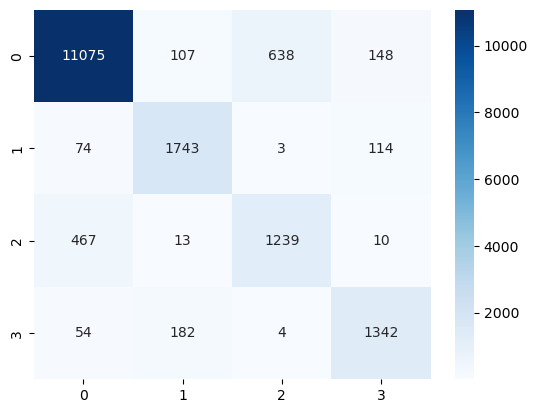

In [23]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = metrics.accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [21]:
predictions_train = model.predict(X_train)

Accuracy: 0.9742
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    107709
           1       0.96      1.00      0.98     17404
           2       0.85      1.00      0.92     15562
           3       0.96      1.00      0.98     14242

    accuracy                           0.97    154917
   macro avg       0.94      0.99      0.97    154917
weighted avg       0.98      0.97      0.97    154917



<Axes: >

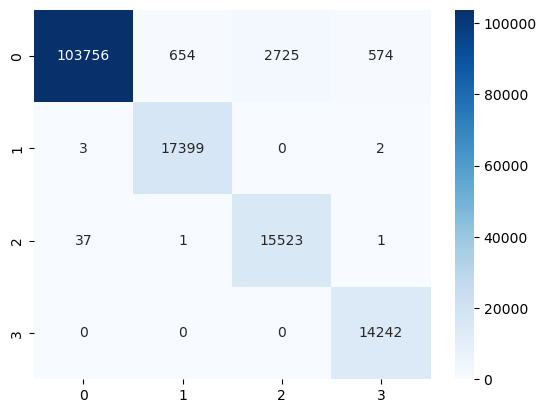

In [22]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = metrics.accuracy_score(y_train, predictions_train)
print(f"Accuracy: {accuracy:.4f}")
cm = confusion_matrix(y_train, predictions_train)
print(classification_report(y_train, predictions_train))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:
import joblib












joblib.load(model, "classifier.pkl") 